### Otsu's Binarization
In global thresholding, we used an arbitrary chosen value as a threshold. In contrast, Otsu's method avoids having to choose a value and determines it automatically.

Consider an image with only two distinct image values (bimodal image), where the histogram would only consist of two peaks. A good threshold would be in the middle of those two values. Similarly, Otsu's method determines an optimal global threshold value from the image histogram.

In order to do so, the cv.threshold() function is used, where cv.THRESH_OTSU is passed as an extra flag. The threshold value can be chosen arbitrary. The algorithm then finds the optimal threshold value which is returned as the first output.

Check out the example below. The input image is a noisy image. In the first case, global thresholding with a value of 127 is applied. In the second case, Otsu's thresholding is applied directly. In the third case, the image is first filtered with a 5x5 gaussian kernel to remove the noise, then Otsu thresholding is applied. See how noise filtering improves the result.

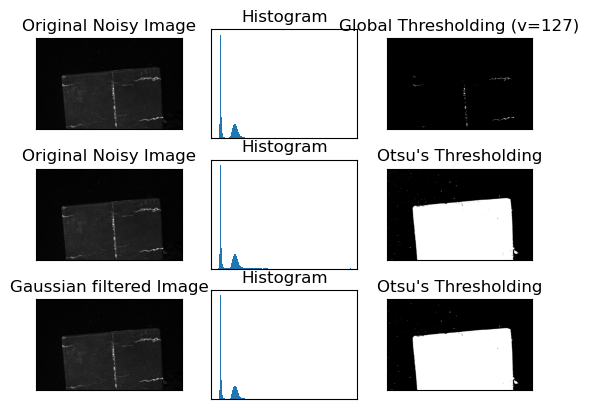

In [46]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('test_image1.bmp', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])


plt.show()

(([], []), ([], []))

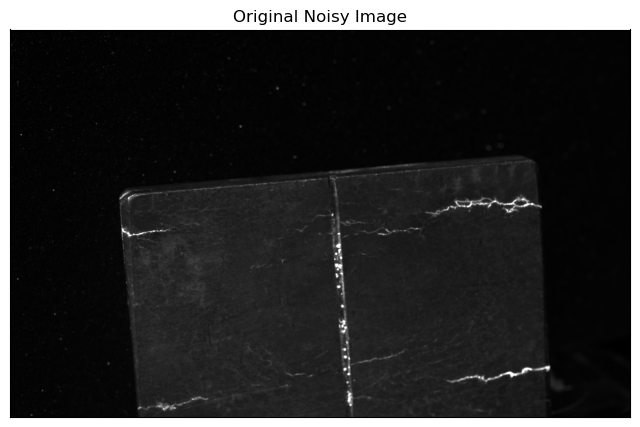

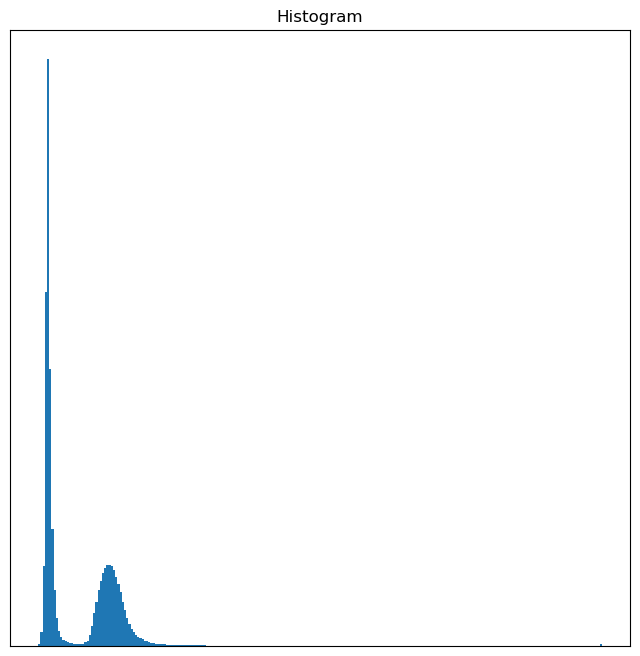

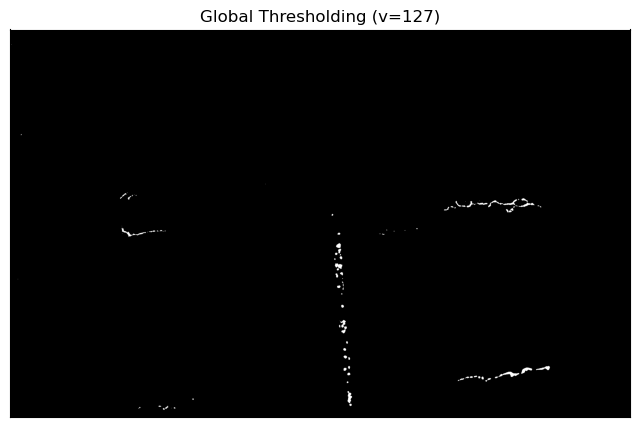

In [47]:
#plt.imshow(images[0],'gray')
plt.subplots(figsize=(8, 8))
plt.imshow(images[0],'gray')
plt.title('Original Noisy Image')
plt.xticks([]),plt.yticks([])

plt.subplots(figsize=(8, 8))
plt.hist(images[0].ravel(),256)
plt.title("Histogram")
plt.xticks([]), plt.yticks([])

plt.subplots(figsize=(8, 8))
plt.imshow(images[2],'gray')
plt.title('Global Thresholding (v=127)')
plt.xticks([]),plt.yticks([])


(([], []), ([], []))

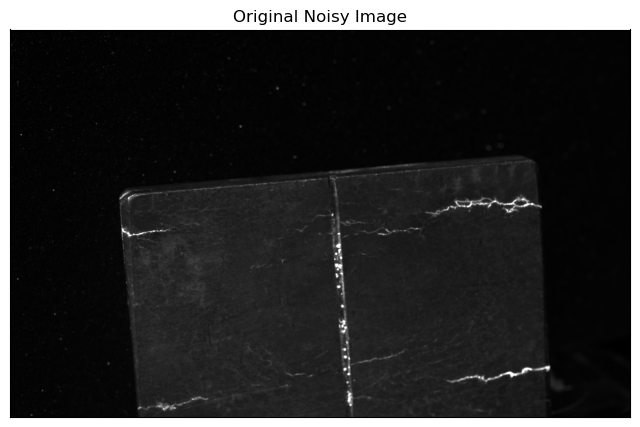

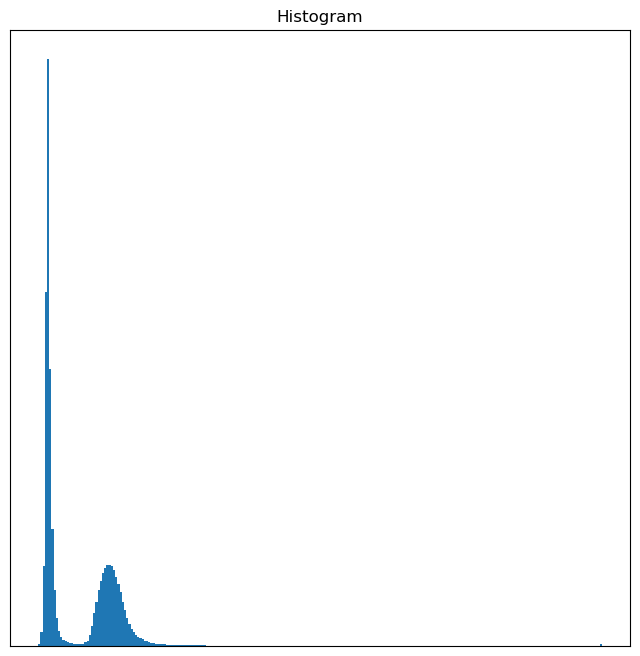

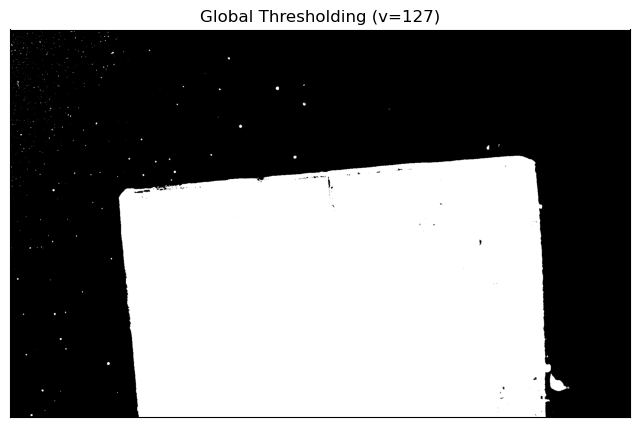

In [35]:
#plt.imshow(images[0],'gray')
plt.subplots(figsize=(8, 8))
plt.imshow(images[3],'gray')
plt.title('Original Noisy Image')
plt.xticks([]),plt.yticks([])

plt.subplots(figsize=(8, 8))
plt.hist(images[3].ravel(),256)
plt.title("Histogram")
plt.xticks([]), plt.yticks([])

plt.subplots(figsize=(8, 8))
plt.imshow(images[5],'gray')
plt.title("Otsu's Thresholding")
plt.xticks([]),plt.yticks([])

(([], []), ([], []))

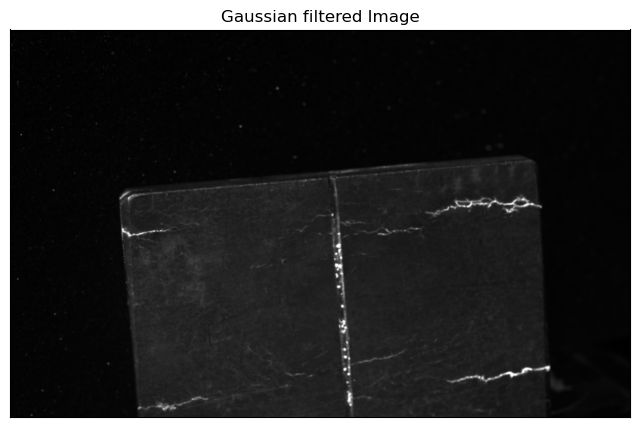

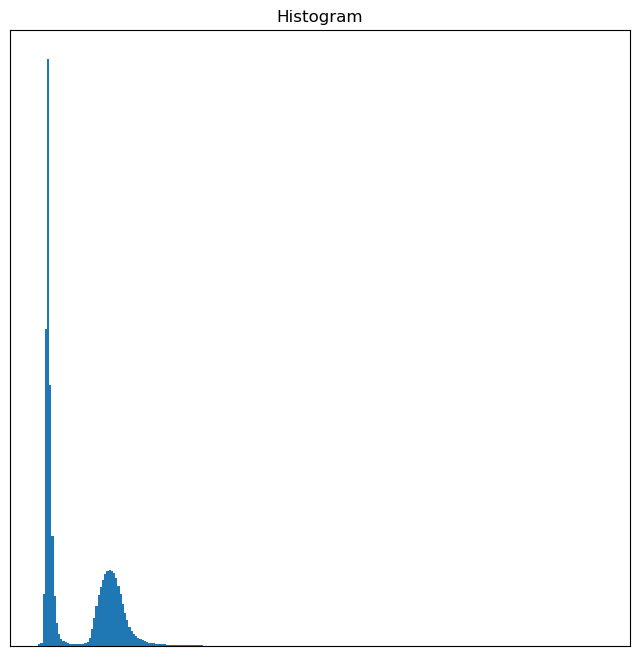

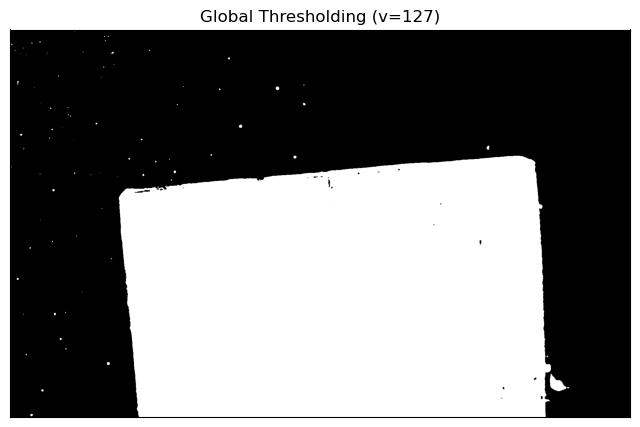

In [37]:
plt.subplots(figsize=(8, 8))
plt.imshow(images[6],'gray')
plt.title('Gaussian filtered Image')
plt.xticks([]),plt.yticks([])

plt.subplots(figsize=(8, 8))
plt.hist(images[6].ravel(),256)
plt.title("Histogram")
plt.xticks([]), plt.yticks([])

plt.subplots(figsize=(8, 8))
plt.imshow(images[8],'gray')
plt.title("Otsu's Thresholding")
plt.xticks([]),plt.yticks([])

### It actually finds a value of t which lies in between two peaks such that variances to both classes are minimal. It can be simply implemented in Python as follows:

In [41]:
img = cv.imread('test_image1.bmp', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.sum()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

23 22.0
